Data : https://www.kaggle.com/residentmario/ramen-ratings

## Data Description
1. Review : unique numbers that inform the review order from the latest
2. Brand : Ramen brand
3. Variety: variation of ramen
4. Style : style of ramen
5. Country: Where the ramen is available
6. Stars : Ramen ratings
7. Top Ten: ramen achievement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
instant_noodle = pd.read_csv('ramen-ratings.csv')

In [4]:
instant_noodle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
instant_noodle.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [6]:
instant_noodle = instant_noodle.dropna(subset=['Style'])

In [7]:
instant_noodle.head()

Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [8]:
instant_noodle = instant_noodle.drop('Top Ten', axis=1)

In [9]:
instant_noodle.head()

Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  
0                          T's Restaurant Tantanmen    Cup   Japan  3.75  
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1  
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25  
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75  
4                                    Singapore Curry  Pack   India  3.75

## Noodle Types

In [10]:
instant_noodle.value_counts('Style')

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
dtype: int64

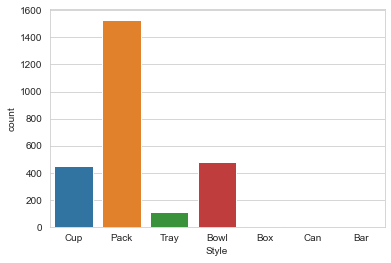

In [11]:
sns.countplot(x='Style', data=instant_noodle)

In [12]:
#Noodle in box packages
instant_noodle[instant_noodle['Style'] == 'Box']

Review #                   Brand  \
36        2544                  Lipton   
80        2500  The Ramen Rater Select   
139       2441                 MyKuali   
161       2419                 MyKuali   
203       2377                 MyKuali   
1471      1109                La Fonte   

                                                Variety Style    Country Stars  
36    Cup-A-Soup Chicken Noodle With White Meat Inst...   Box        USA   1.5  
80                        Supreme Creamy Tom Yum Noodle   Box   Malaysia     5  
139                  Penang Hokkien Prawn Flavor Noodle   Box      Japan     5  
161                            Penang Red Tom Yum Goong   Box      Japan     5  
203   Penang White Curry Instant Noodle (Japan Version)   Box   Malaysia     5  
1471                     Spaghetti With Bolognese Sauce   Box  Indonesia  4.25

In [13]:
#Noodle in Box Packages
instant_noodle[instant_noodle['Style'] == 'Box']

Review #                   Brand  \
36        2544                  Lipton   
80        2500  The Ramen Rater Select   
139       2441                 MyKuali   
161       2419                 MyKuali   
203       2377                 MyKuali   
1471      1109                La Fonte   

                                                Variety Style    Country Stars  
36    Cup-A-Soup Chicken Noodle With White Meat Inst...   Box        USA   1.5  
80                        Supreme Creamy Tom Yum Noodle   Box   Malaysia     5  
139                  Penang Hokkien Prawn Flavor Noodle   Box      Japan     5  
161                            Penang Red Tom Yum Goong   Box      Japan     5  
203   Penang White Curry Instant Noodle (Japan Version)   Box   Malaysia     5  
1471                     Spaghetti With Bolognese Sauce   Box  Indonesia  4.25

In [14]:
#Noodle in Can Packages
instant_noodle[instant_noodle['Style'] == 'Can']

Review #     Brand                                         Variety Style  \
67      2513  Pringles  Nissin Top Ramen Chicken Flavor Potato Crisps    Can   

   Country Stars  
67     USA   3.5

In [15]:
#Noodle in bar Packages
instant_noodle[instant_noodle['Style'] == 'Bar']

Review #                 Brand        Variety Style Country Stars
1425      1155  Komforte Chockolates  Savory Ramen    Bar     USA     5

In [16]:
from PIL import Image
import requests
from io import BytesIO

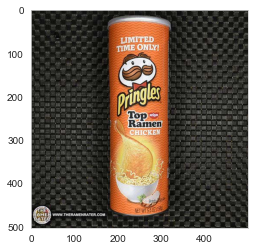

In [17]:
#Image of Can noodle thing
snack_ramen = requests.get('https://www.theramenrater.com/wp-content/uploads/2017/07/2017_7_25_2513_001.jpg')
img = Image.open(BytesIO(snack_ramen.content))
plt.imshow(img)
plt.grid(None)
plt.show()

มันคือมันฝรั่งแผ่นรสราเมน

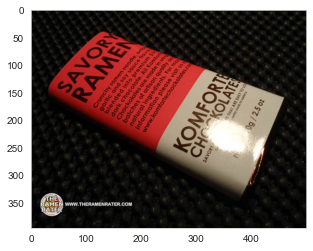

In [18]:
#Image of bar noodle thing
choc_ramen = requests.get('https://www.theramenrater.com/wp-content/uploads/2013/08/2013_8_31_1155_001.jpg')
img = Image.open(BytesIO(choc_ramen.content))
plt.imshow(img)
plt.grid(None)
plt.show()

มันคือ Chocolate รสราเมน

In [19]:
instant_noodle = instant_noodle[instant_noodle['Style'] != 'Can']
instant_noodle = instant_noodle[instant_noodle['Style'] != 'Bar']

In [20]:
instant_noodle.value_counts('Style')

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
dtype: int64

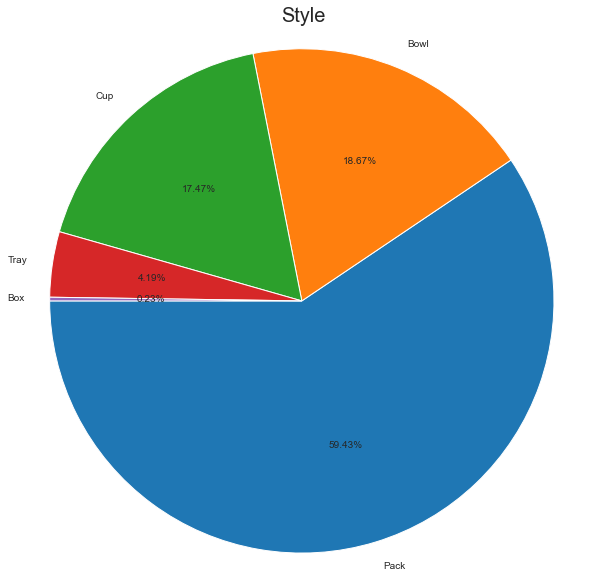

In [49]:
#Pie plot of type of packages style
labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box' 
size = [1531, 481, 450, 108, 6]

f, ax = plt.subplots(1,1, figsize= (10,10))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Style", size = 20)

plt.show()

## Top 10 Countries that make instant noodles products

In [21]:
instant_noodle.value_counts('Country').head(10)

Country
Japan          352
USA            321
South Korea    309
Taiwan         223
Thailand       191
China          168
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
dtype: int64

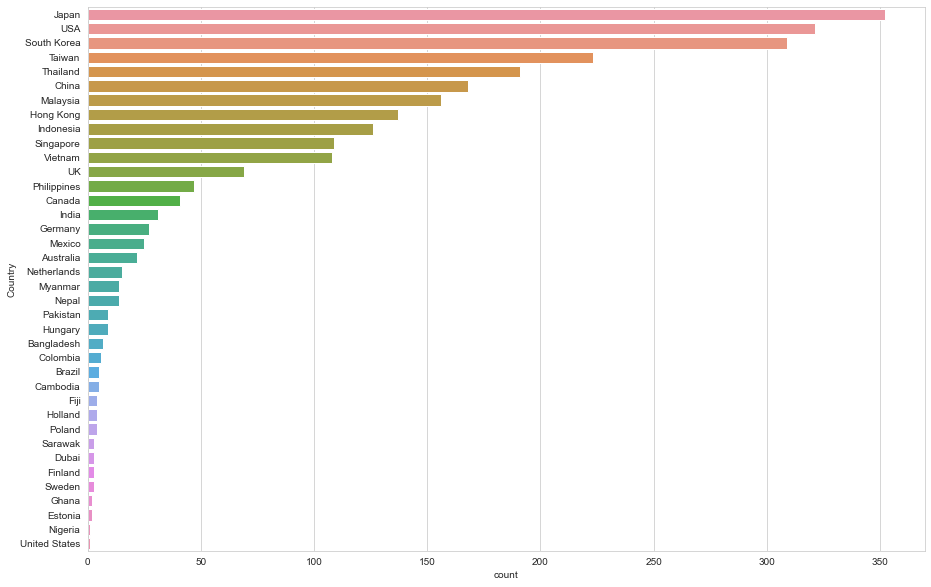

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(y='Country', data=instant_noodle ,order=instant_noodle['Country'].value_counts().index)

## Average review scores of each package type of instant noodle

In [23]:
# sns.boxplot(x='Style',y='Stars', data=instant_noodle)

จากโค้ดด้านบนที่คอมเม้นนั้นพบว่าเกิด Error เนื่องจากเป็น Data Type ที่ไม่สามารถพบได้จึงทำการเปลี่ยน Data Type 

In [24]:
# instant_noodle['Stars'].astype('float64').dtypes

แต่ไม่สามารถเปลี่ยนได้เพราะในการใน Rating ของ Instant noodle นั้นมีคะแนนแบบ Unrated อยู่

In [25]:
# Show Instant Noodles that unrated
instant_noodle[instant_noodle['Stars'] == 'Unrated']

Review #          Brand                                Variety Style  \
32       2548         Ottogi  Plain Instant Noodle No Soup Included  Pack   
122      2458  Samyang Foods                             Sari Ramen  Pack   
993      1587       Mi E-Zee                          Plain Noodles  Pack   

         Country    Stars  
32   South Korea  Unrated  
122  South Korea  Unrated  
993     Malaysia  Unrated

จะทำการ Drop ข้อมูลทั้ง 3 ตัวนี้ไปเพื่อให้วัดผลได้เพราะ ข้อมูลทิ้งสามตัวนี้ทาง RamenEater ไม่ได้ให้คะแนนไว้เพราะเป็นเส้นราเมนเปล่า สามารถดูข้อมูลราเมนทั้ง 3 แบบนี้ได้ที่ลิ้งที่แนบให้

- [Ottogi Plain Instant Noodle No Soup Included](https://www.theramenrater.com/2017/09/11/2548-ottogi-plain-instant-noodle/)
- [Samyang Foods Sari Ramen](https://www.theramenrater.com/2017/05/31/2458-samyang-foods-sari-ramen/)
- [Mi E-Zee 	Plain Noodles](https://www.theramenrater.com/2015/02/14/mi-e-zee-plain-noodles/)

In [26]:
instant_noodle = instant_noodle[instant_noodle['Stars'] != 'Unrated']

In [27]:
instant_noodle[instant_noodle['Stars'] == 'Unrate']

Empty DataFrame
Columns: [Review #, Brand, Variety, Style, Country, Stars]
Index: []

In [28]:
instant_noodle['Stars'] = instant_noodle['Stars'].astype('float64')

In [29]:
instant_noodle['Style'] = instant_noodle['Style'].astype('category')

In [30]:
instant_noodle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2573 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Review #  2573 non-null   int64   
 1   Brand     2573 non-null   object  
 2   Variety   2573 non-null   object  
 3   Style     2573 non-null   category
 4   Country   2573 non-null   object  
 5   Stars     2573 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 123.3+ KB


In [50]:
instant_noodle.groupby('Style')['Stars'].mean()

Style
Bowl    3.670686
Box     4.291667
Cup     3.498500
Pack    3.700458
Tray    3.545139
Name: Stars, dtype: float64

Average scores of Instant Noodle are getting reviews

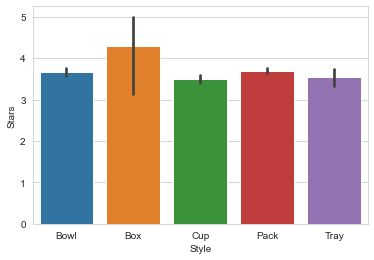

In [31]:
sns.barplot(x='Style', y='Stars', data=instant_noodle, estimator=np.mean)

## All instant noodles are available in Thailand

In [32]:
thai_noodles = instant_noodle[instant_noodle['Country'] == 'Thailand'].reset_index()

In [33]:
thai_noodles = thai_noodles.drop('index', axis=1)

In [34]:
thai_noodles

Review #         Brand  \
0        2570   Tao Kae Noi   
1        2432  Fashion Food   
2        2376        Nissin   
3        2317          MAMA   
4        2266        Nissin   
..        ...           ...   
186        35          Mama   
187        29      Mee Jang   
188         4       Wai Wai   
189         3       Wai Wai   
190         2       Wai Wai   

                                               Variety Style   Country  Stars  
0                          Creamy tom Yum Kung Flavour  Pack  Thailand   5.00  
1                   Yummy Spicy Rice Soup With Seafood  Bowl  Thailand   3.50  
2      Disney Cuties Instant Chicken With Corn Flavour   Cup  Thailand   3.25  
3    Instant Bowl Noodles Shrimp (Tom Yum) Flavor Base  Bowl  Thailand   4.00  
4            Disney Cuties Instant Noodle Crab Flavour   Cup  Thailand   4.00  
..                                                 ...   ...       ...    ...  
186                                   Chand Clear Soup  Pack  Thailand   3.00  
187                                     Tom Yum Shrimp  Bowl  Thailand   3.50  
188                     Oriental Style Instant Noodles  Pack  Thailand   1.00  
189                                     Tom Yum Shrimp  Pack  Thailand   2.00  
190                               Tom Yum Chili Flavor  Pack  Thailand   2.00  

[191 rows x 6 columns]

In [35]:
thai_noodles['Brand'].unique()

array(['Tao Kae Noi', 'Fashion Food', 'Nissin', 'MAMA', 'President Rice',
       '7 Select', 'Zow Zow', 'Bamee', 'Yum Yum', 'Mama', 'Wai Wai',
       'Little Cook', '7 Select/Nissin', 'Kin-Dee', 'Ruski',
       'Thai Choice', 'Papa', 'Sunlee', "Kim's Bowl", 'GreeNoodle',
       'Fashion Foods', 'Mee Jang', 'Knorr', 'Royal Umbrella', 'Boss'],
      dtype=object)

In [36]:
print(len(thai_noodles['Brand'].unique()))

25


มีแบรนด์ที่ชื่อซ้ำกันอยู่คือแบรนด์ มาม่า ซึ่งคือแบรนด์เดียวกันแต่เขียนต่างกัน จึงต้องทำให้เหมือนกัน

In [37]:
thai_noodles['Brand'] = thai_noodles['Brand'].replace('Mama','MAMA')

In [55]:
thai_noodles

Review #         Brand  \
0        2570   Tao Kae Noi   
1        2432  Fashion Food   
2        2376        Nissin   
3        2317          MAMA   
4        2266        Nissin   
..        ...           ...   
186        35          MAMA   
187        29      Mee Jang   
188         4       Wai Wai   
189         3       Wai Wai   
190         2       Wai Wai   

                                               Variety Style   Country  Stars  
0                          Creamy tom Yum Kung Flavour  Pack  Thailand   5.00  
1                   Yummy Spicy Rice Soup With Seafood  Bowl  Thailand   3.50  
2      Disney Cuties Instant Chicken With Corn Flavour   Cup  Thailand   3.25  
3    Instant Bowl Noodles Shrimp (Tom Yum) Flavor Base  Bowl  Thailand   4.00  
4            Disney Cuties Instant Noodle Crab Flavour   Cup  Thailand   4.00  
..                                                 ...   ...       ...    ...  
186                                   Chand Clear Soup  Pack  Thailand   3.00  
187                                     Tom Yum Shrimp  Bowl  Thailand   3.50  
188                     Oriental Style Instant Noodles  Pack  Thailand   1.00  
189                                     Tom Yum Shrimp  Pack  Thailand   2.00  
190                               Tom Yum Chili Flavor  Pack  Thailand   2.00  

[191 rows x 6 columns]

In [39]:
thai_noodles['Brand'].unique()

array(['Tao Kae Noi', 'Fashion Food', 'Nissin', 'MAMA', 'President Rice',
       '7 Select', 'Zow Zow', 'Bamee', 'Yum Yum', 'Wai Wai',
       'Little Cook', '7 Select/Nissin', 'Kin-Dee', 'Ruski',
       'Thai Choice', 'Papa', 'Sunlee', "Kim's Bowl", 'GreeNoodle',
       'Fashion Foods', 'Mee Jang', 'Knorr', 'Royal Umbrella', 'Boss'],
      dtype=object)

In [40]:
print(len(thai_noodles['Brand'].unique()))

24


## Amount of products of instance noodle in Thailand made for each brand

In [56]:
thai_noodles['Brand'].value_counts()

MAMA               74
Wai Wai            22
Nissin             17
Little Cook        13
Yum Yum            12
Sunlee              8
Mee Jang            7
Fashion Foods       5
Ruski               5
GreeNoodle          4
Bamee               4
Thai Choice         3
Fashion Food        3
Royal Umbrella      2
Kin-Dee             2
7 Select            2
7 Select/Nissin     1
Kim's Bowl          1
President Rice      1
Papa                1
Knorr               1
Tao Kae Noi         1
Zow Zow             1
Boss                1
Name: Brand, dtype: int64

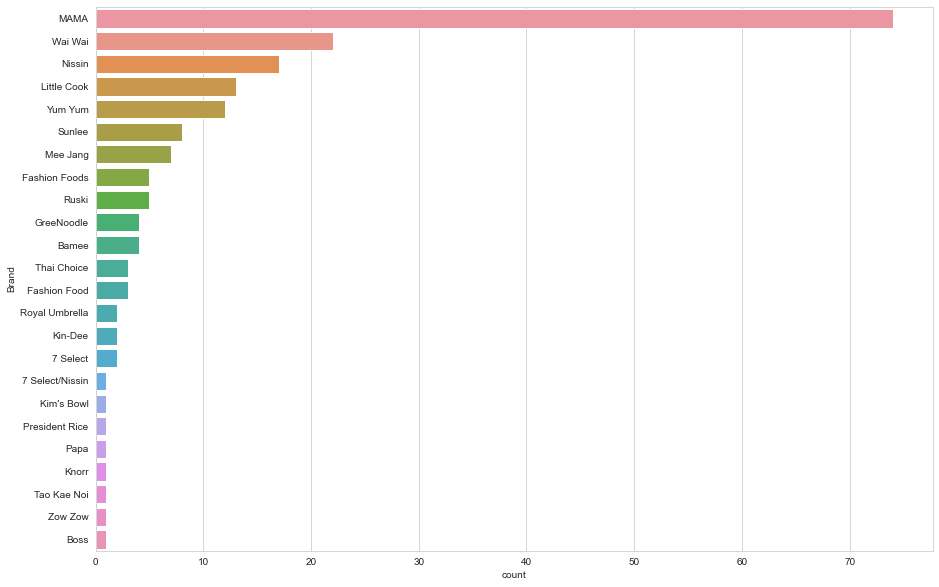

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(y='Brand', data=thai_noodles ,order=thai_noodles['Brand'].value_counts().index)

## Top 10 Thailand Instant Noodles Brand Rating in RamenEater Reviews

In [42]:
brands = list(thai_noodles['Brand'].unique())
counter = [0.0]*24

brands_cnt = dict(zip(brands, counter)) #create dictionary to count all ratings and then save the averages

for brand in brands:
    brands_data = thai_noodles[thai_noodles['Brand'] == brand]
    for star in brands_data['Stars']:
        brands_cnt[brand] += float(star) #count all ratings
    brands_cnt[brand] /= len(brands_data) #average

In [45]:
top10ratings = [] #list for saving the brand name and its average rating
for key, values in brands_cnt.items():
    top10ratings.append([key,values])

#print the top 10 ramen ratings by brand
top10ratings = sorted(top10ratings, key = lambda x : x[1], reverse = True) #sorting values in descending order
top10ratings
for i in range(10):
    print('#{:<3}{:25} {}'.format(i+1, top10ratings[i][0], round(top10ratings[i][1],2)))

#1  Tao Kae Noi               5.0
#2  Ruski                     3.85
#3  Nissin                    3.81
#4  7 Select                  3.75
#5  Zow Zow                   3.75
#6  Yum Yum                   3.75
#7  Kin-Dee                   3.75
#8  MAMA                      3.63
#9  7 Select/Nissin           3.5
#10 Kim's Bowl                3.5
